In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from arch import arch_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df= pd.read_csv('walmart-sales-dataset-of-45stores.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


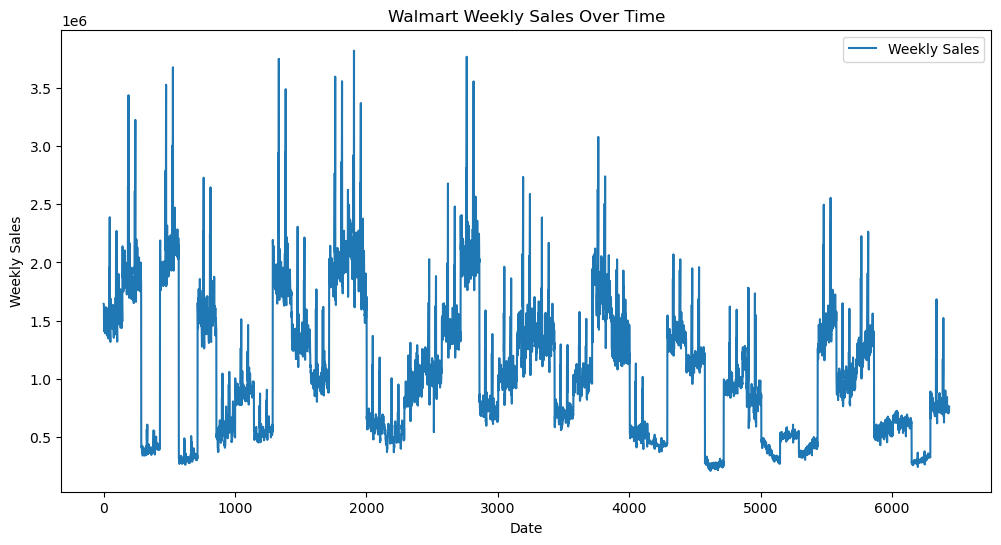

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Weekly_Sales'], label='Weekly Sales')
plt.title('Walmart Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
# Assuming df is your DataFrame and 'Weekly_Sales' is the column you want to test
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check if the data is stationary
if result[1] <= 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -4.624149498578307
p-value: 0.00011655869699901115
Critical Values: {'1%': -3.4313721757424656, '5%': -2.8619917128968813, '10%': -2.5670104435791017}
The data is stationary.


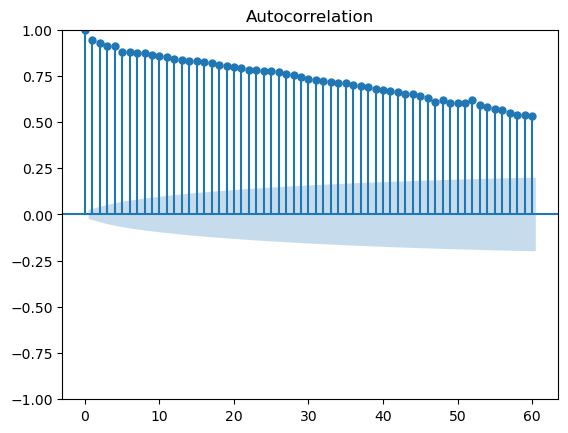

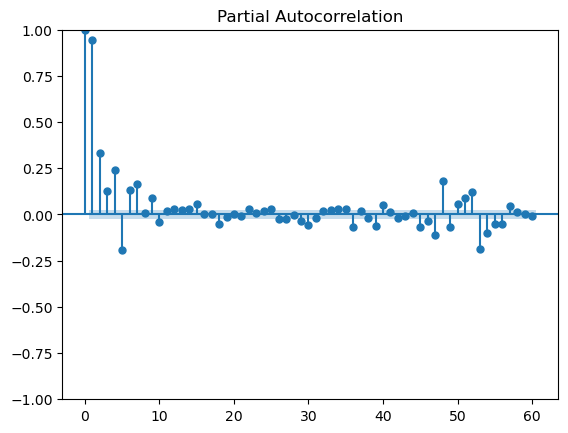

In [7]:
# Plot ACF and PACF for parameter selection
plot_acf(df['Weekly_Sales'], lags=60)
plot_pacf(df['Weekly_Sales'], lags=60)
plt.show()

### Its An AR Model Mostly form looking at the plots as pacf has significant lags and acf has geometric decay

In [8]:
order = (3, 0, 0)  
model = SARIMAX(df['Weekly_Sales'], order=order)
results = model.fit()
print("ARIMA Model Parameters:")
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34814D+01    |proj g|=  2.34991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      3      1     0     0   2.416D-05   1.348D+01
  F =   13.481420620999698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Model Parameters:
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:      

 This problem is unconstrained.


In [9]:
order = (2, 0, 0)  
model = SARIMAX(df['Weekly_Sales'], order=order)
results1 = model.fit()
# 5. Parameter Estimation
print("ARIMA Model Parameters:")
print(results1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34904D+01    |proj g|=  2.35488D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.342D-06   1.349D+01
  F =   13.490399060072155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Model Parameters:
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:      

Ljung-Box Test Results:
       lb_stat      lb_pvalue
1     7.462200   6.300796e-03
2    31.193707   1.684119e-07
3   196.600411   2.289221e-42
4   429.141689   1.401704e-91
5   757.695805  1.637669e-161
6   812.922348  2.484850e-172
7   812.927457  3.010903e-171
8   839.189953  7.339482e-176
9   839.637815  6.218204e-175
10  843.012813  1.162064e-174


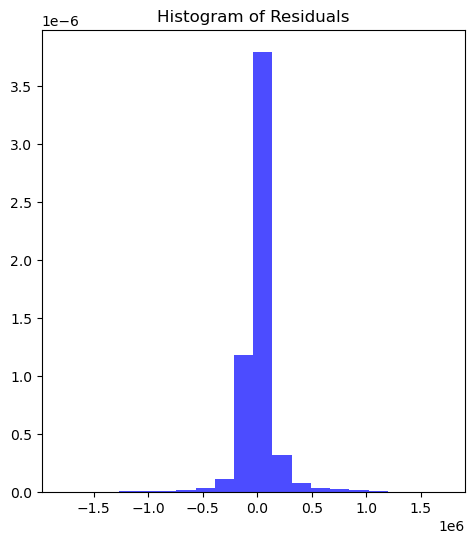

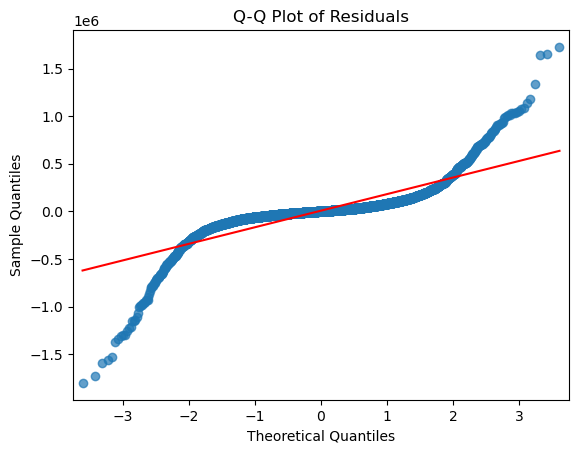

In [10]:
residuals = results.resid

# Perform Ljung-Box test on residuals
lb_test_result = sm.stats.acorr_ljungbox(residuals, lags=10, return_df=True)
print("Ljung-Box Test Results:")
print(lb_test_result)

# Plot histogram and Q-Q plot of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, density=True, alpha=0.7, color='b', label='Residuals')
plt.title('Histogram of Residuals')
sm.qqplot(residuals, line='s', color='r', alpha=0.7)
plt.title('Q-Q Plot of Residuals')
plt.show()


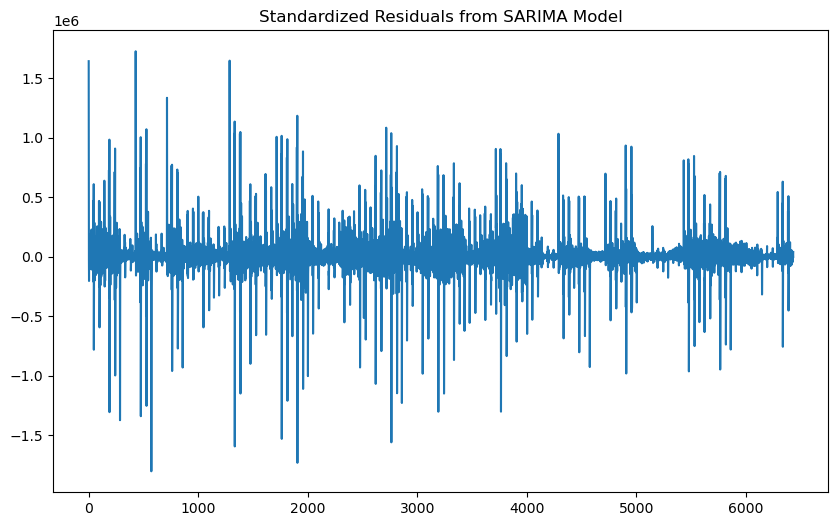

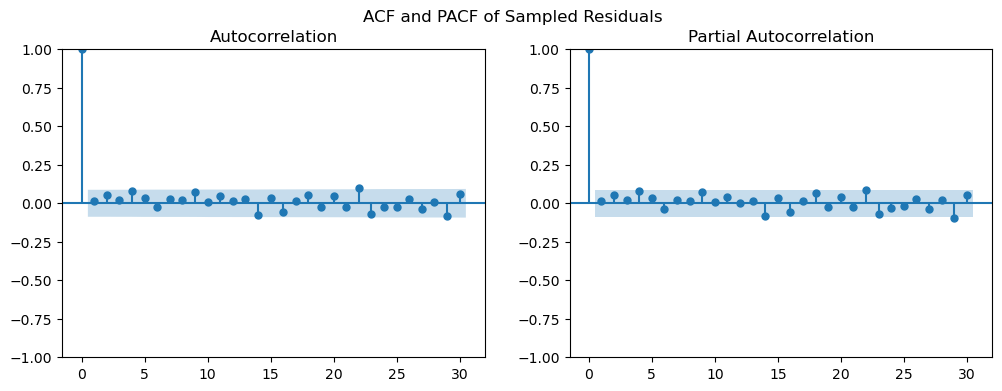

In [11]:
sample_size = 500

# Randomly sample residuals
random_indices = np.random.choice(len(results.resid), size=sample_size, replace=True)
sampled_residuals =results.resid[random_indices]/ results.resid[random_indices].std()

# 6. Residual Analysis
fig, ax = plt.subplots(figsize=(10, 6))
residuals.plot(ax=ax)
ax.set_title('Standardized Residuals from SARIMA Model')
plt.show()

# ACF and PACF of Sampled Residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(sampled_residuals, lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(sampled_residuals, lags=30, ax=ax2)
plt.suptitle('ACF and PACF of Sampled Residuals')
plt.show()



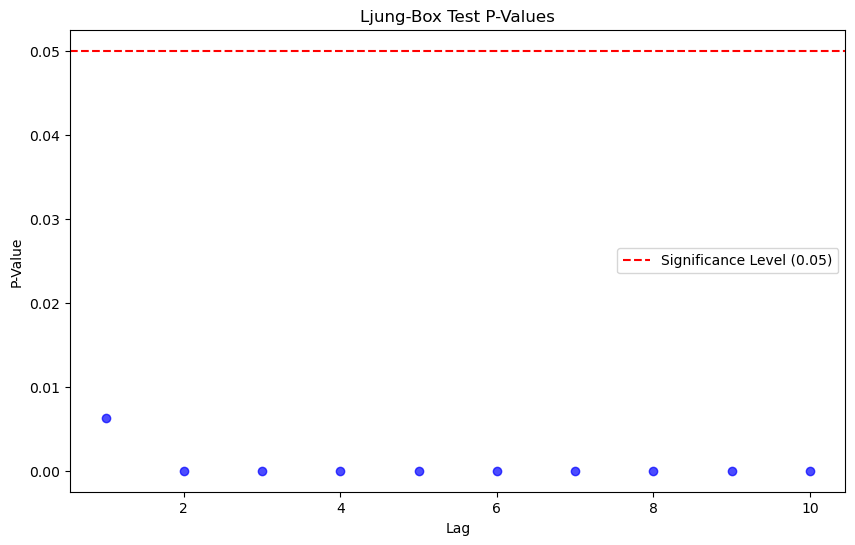

In [12]:
# Assuming ljung_box_results is a DataFrame or a similar structure with 'lb_pvalue' column
p_values = lb_test_result['lb_pvalue']

# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(p_values) + 1), p_values, color='blue', alpha=0.7)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()



In [23]:
np.random.seed(42)

# Generate example data for illustration purposes
date_rng = pd.date_range(start='2010-02-05', end='2012-12-31', freq='M')
data = np.random.randn(len(date_rng))
df = pd.DataFrame(data, columns=['Weekly_Sales'], index=date_rng)

# Split your data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

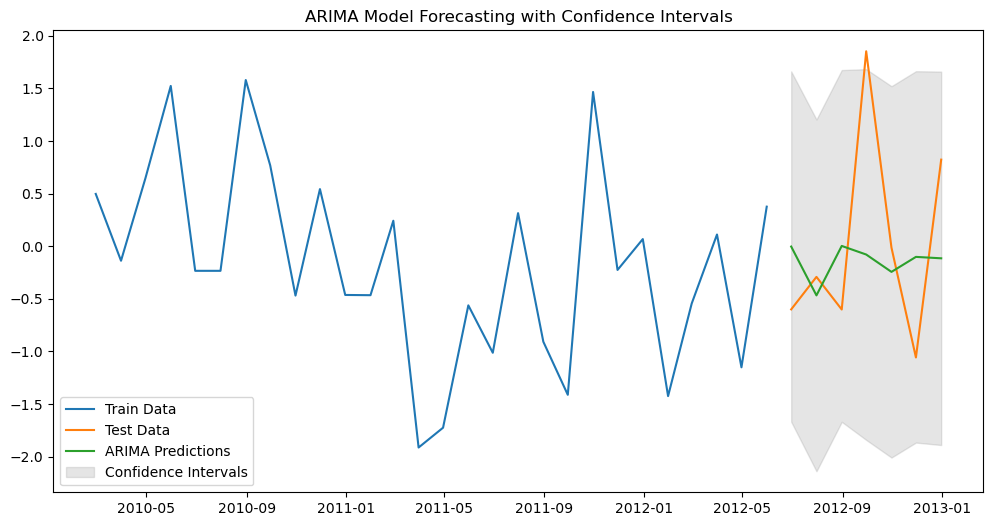

In [26]:
# ARIMA Model
p, d, q = 3,0, 0  # Example ARIMA order, you can adjust these parameters
arima_model = sm.tsa.ARIMA(train_data['Weekly_Sales'], order=(p, d, q))
arima_results = arima_model.fit()

# Make predictions on the test set with confidence intervals
arima_predictions = arima_results.get_forecast(steps=len(test_data))
arima_predicted_values = arima_predictions.predicted_mean
arima_conf_int = arima_predictions.conf_int()

# Plot ARIMA predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Weekly_Sales'], label='Train Data')
plt.plot(test_data.index, test_data['Weekly_Sales'], label='Test Data')
plt.plot(arima_predicted_values.index, arima_predicted_values, label='ARIMA Predictions')
plt.fill_between(arima_conf_int.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Intervals')
plt.title('ARIMA Model Forecasting with Confidence Intervals')
plt.legend()
plt.show()
